<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [ ]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

pagina = BeautifulSoup(open(NOME_ARQUIVO_FONTE), 'xml')


In [ ]:
# visualize os resultados

pagina

<?xml version="1.0" encoding="utf-8"?>
<ESTADOS>
<ESTADO>
<ID>1</ID>
<NOME>ACRE</NOME>
<IDCAPITAL>16</IDCAPITAL>
<SIGLA>AC</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>2</ID>
<NOME>ALAGOAS</NOME>
<IDCAPITAL>68</IDCAPITAL>
<SIGLA>AL</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>3</ID>
<NOME>AMAPA</NOME>
<IDCAPITAL>131</IDCAPITAL>
<SIGLA>AP</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>4</ID>
<NOME>AMAZONAS</NOME>
<IDCAPITAL>178</IDCAPITAL>
<SIGLA>AM</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>5</ID>
<NOME>BAHIA</NOME>
<IDCAPITAL>536</IDCAPITAL>
<SIGLA>BA</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>6</ID>
<NOME>CEARA</NOME>
<IDCAPITAL>676</IDCAPITAL>
<SIGLA>CE</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>7</ID>
<NOME>DISTRITO FEDERAL</NOME>
<IDCAPITAL>916</IDCAPITAL>
<SIGLA>DF</SIGLA>
<REGIAO>CENTRO-OESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>8</ID>
<NOME>ESPIRITO SANTO</NOME>
<IDCAPITAL>879</IDCAPITAL>
<SIGLA>ES</SIGLA>
<REGIAO>SU

In [ ]:
!pip install --upgrade pandas

In [ ]:
import pandas as pd

print(pd.__version__)

2.0.3


In [ ]:
# manipule os dados

import pandas as pd


df = pd.read_xml("estados-bruto.xml")


print(df)

    ID                 NOME  IDCAPITAL SIGLA        REGIAO
0    1                 ACRE         16    AC         NORTE
1    2              ALAGOAS         68    AL      NORDESTE
2    3                AMAPA        131    AP         NORTE
3    4             AMAZONAS        178    AM         NORTE
4    5                BAHIA        536    BA      NORDESTE
5    6                CEARA        676    CE      NORDESTE
6    7     DISTRITO FEDERAL        916    DF  CENTRO-OESTE
7    8       ESPIRITO SANTO        879    ES       SUDESTE
8    9                GOIAS        973    GO  CENTRO-OESTE
9   10             MARANHAO       1309    MA      NORDESTE
10  11          MATO GROSSO       1374    MT  CENTRO-OESTE
11  12   MATO GROSSO DO SUL       1485    MS  CENTRO-OESTE
12  13                 PARA       1561    PA         NORTE
13  14              PARAIBA       1779    PB      NORDESTE
14  15               PARANA       2002    PR           SUL
15  16           PERNAMBUCO       2439    PE      NORDES

In [ ]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;



df.to_csv('estados-limpo.csv', index=False)



### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

**1**. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [ ]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = "cidades-bruto.csv"

fonte = pd.read_csv (NOME_ARQUIVO_FONTE,encoding="utf-8",sep=",",usecols=["UF","nome", "PIB", "Pop_est_2009" , "PIB_percapita","Censo"])

fonte= fonte.rename(columns={"nome": "CIDADE","UF":"NOME"})







In [ ]:
# visualize os resultados
fonte.head()
# continue o codigo aqui

,NOME,CIDADE,Censo,PIB,Pop_est_2009,PIB_percapita
0,BAHIA,Tremedal,2010.00,57883.99,18433,3140.24
1,RIO GRANDE DO SUL,Turuçu,2010.00,45723.88,4000,11430.97
2,ESPIRITO SANTO,Vitória,2010.00,19782628.00,320156,61790.59
3,MINAS GERAIS,Jacutinga,2010.00,247816.00,21424,11567.21
4,PIAUÍ,Nazária,2010.00,20951.38,7895,2653.75


In [ ]:
# manipule os dados
fonte = fonte[fonte['Censo'] == 2010]
fonte ['NOME'] = fonte['NOME'].apply(lambda NOME: 'SAO PAULO' if NOME == 'SÃO PAULO' else NOME.replace('SÃO PAULO', 'SAO PAULO'))

pd.set_option("float_format", "{:.2f}".format)


print (fonte)
# continue o codigo aqui

                   NOME            CIDADE   Censo         PIB  Pop_est_2009  \
0                 BAHIA          Tremedal 2010.00    57883.99         18433   
1     RIO GRANDE DO SUL            Turuçu 2010.00    45723.88          4000   
2        ESPIRITO SANTO           Vitória 2010.00 19782628.00        320156   
3          MINAS GERAIS         Jacutinga 2010.00   247816.00         21424   
4                 PIAUÍ           Nazária 2010.00    20951.38          7895   
...                 ...               ...     ...         ...           ...   
5561     SANTA CATARINA         Campo Erê 2010.00   187628.91          9737   
5562             PARANÁ          Planalto 2010.00   138553.55         13983   
5563          SAO PAULO        Guararapes 2010.00   532019.12         29639   
5564  RIO GRANDE DO SUL  Barra do Guarita 2010.00    21980.64          3067   
5565  RIO GRANDE DO SUL        Machadinho 2010.00    57150.17          5623   

      PIB_percapita  
0           3140.24  
1      

In [ ]:
type(fonte)

pandas.core.frame.DataFrame

In [ ]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

fonte.to_csv ('cidades-limpo.csv', index=";")

#NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

# continue o codigo aqui

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [ ]:
# solução do exercício 1.3

Df_Estados = pd.read_csv("estados-limpo.csv")
Df_cidades = pd.read_csv("cidades-limpo.csv")

In [ ]:
Brasil = pd.merge(left = Df_Estados, right = Df_cidades, on = "NOME", how = "outer")

In [ ]:
Brasil.to_csv ('Brasil.csv', index=";")

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [ ]:
# solução do exercício 2.1

Brasil_Df = pd.read_csv("Brasil.csv")

### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [ ]:
# código para responder a pergunta

Brasil_Df.groupby("CIDADE")["Pop_est_2009"].sum().sort_values(ascending=False).head(10)


CIDADE
São Paulo        11037593.00
Rio de Janeiro    6186710.00
Salvador          2998056.00
Brasília          2606885.00
Fortaleza         2505552.00
Belo Horizonte    2452617.00
Curitiba          1851215.00
Manaus            1738641.00
Recife            1561659.00
Belém             1460429.00
Name: Pop_est_2009, dtype: float64

 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [ ]:
# código para responder a pergunta
Brasil_DF_PIB5 = Brasil_Df[Brasil_Df['REGIAO'] == "NORTE"]
Brasil_DF_PIB5.groupby("CIDADE")["PIB"].sum().sort_values(ascending=False).tail(5)



CIDADE
Cachoeirinha             12054.81
Taipas do Tocantins      11962.88
Oliveira de Fátima       11591.95
Chapada de Areia         11322.54
São Félix do Tocantins    8387.25
Name: PIB, dtype: float64

 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [ ]:
# código para responder a pergunta
Brasil_DF_PIBSP = Brasil_Df[Brasil_Df['NOME'] == "SAO PAULO"]
Brasil_DF_PIBSP.groupby("CIDADE")["PIB"].sum().sort_values(ascending=False).head(15)

CIDADE
São Paulo               389317152.00
Guarulhos                32473828.00
Campinas                 31654720.00
Osasco                   31616452.00
São Bernardo do Campo    28935768.00
Barueri                  26908070.00
Santos                   22546134.00
São José dos Campos      22018042.00
Jundiaí                  16585137.00
Santo André              14709603.00
Ribeirão Preto           14688064.00
Sorocaba                 14182597.00
Diadema                   9969819.00
Piracicaba                9601211.00
São Caetano do Sul        8920202.00
Name: PIB, dtype: float64

 - Qual é o PIB do estado de Santa Catarina?

In [ ]:
# código para responder a pergunta
Brasil_DF_PIBSC = Brasil_Df[Brasil_Df['NOME'] == "SANTA CATARINA"]
Brasil_DF_PIBSC.groupby("NOME")["PIB"].sum()




NOME
SANTA CATARINA   129806256.75
Name: PIB, dtype: float64

 - Qual é o população da região sul?

In [ ]:
# código para responder a pergunta
Brasil_DF_Psul = Brasil_Df[Brasil_Df['REGIAO'] == "SUL"]
Brasil_DF_Psul = Brasil_DF_Psul ["Pop_est_2009"].sum()
print (Brasil_DF_Psul)

17032871.0


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [ ]:
# código para responder a pergunta
Brasil_DF_PIBMTS = Brasil_Df[Brasil_Df['NOME'] == "MATO GROSSO DO SUL"]
Brasil_DF_PIBMTS = Brasil_DF_PIBMTS ["PIB_percapita"].sum()
print (Brasil_DF_PIBMTS)


1127793.9550781003


 - Qual é a população do Brasil?

In [ ]:
# código para responder a pergunta
PopulaçaoTT = Brasil_Df ["Pop_est_2009"].sum()
print(PopulaçaoTT)

191176146.0


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

<Axes: xlabel='CIDADE'>

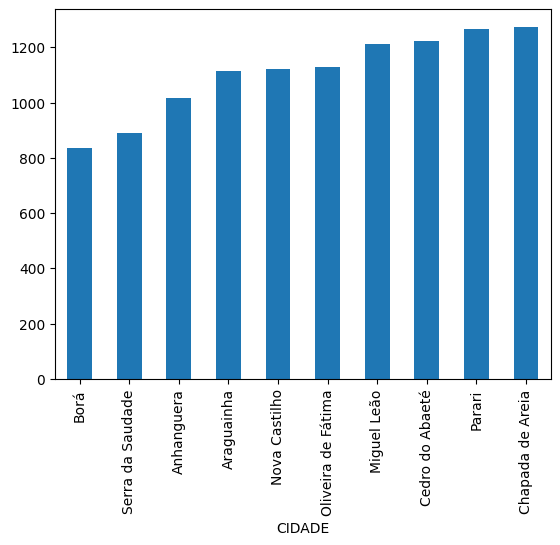

In [339]:
# código para gerar a visualização
Menos_populosas = Brasil_Df.groupby("CIDADE")["Pop_est_2009"].sum().sort_values(ascending=True).head(10)
Menos_populosas.plot.bar()


 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

<Axes: ylabel='Pop_est_2009'>

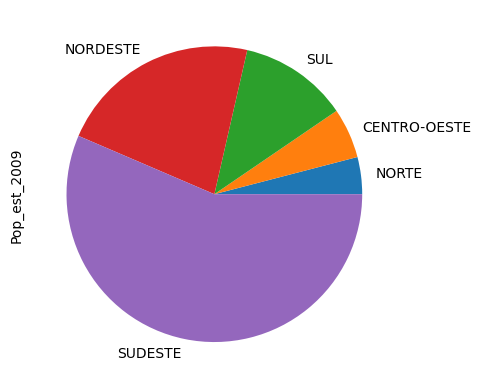

In [341]:
# código para gerar a visualização
Menos_populosas = Brasil_Df.groupby("REGIAO")["Pop_est_2009"].sum().sort_values(ascending=True).head(10)
Menos_populosas.plot.pie()